In [1]:
#VERİ SETİMİZ:https://www.kaggle.com/datasets/akhil14shukla/binance-coin-prices-per-day

#AIM: I want to predict crypto prices as accurately as possible (I know it's difficult).
#Though using per day prices is not good in real life, and I will shift to hourly or minute, after working on this dataset.

#Verilen veri, farklı tarihlerde Bitcoin'in (BTC) Tether (USDT) karşısındaki fiyat ve ticaret bilgilerini içermektedir.

#Unix: Bu sütun, Ocak 1, 1970 tarihinden UTC 00:00:00'den bu yana geçen milisaniye cinsinden süreyi temsil eden Unix zaman damgalarını içerir.
#Date: Bu sütun, insanlar tarafından okunabilir bir formatta tarihi ve saati temsil eder (YYYY-MM-DD HH:MM:SS).
#Symbol: Ticaret çiftini gösterir; burada BTC/USDT, yani Bitcoin'in Tether cinsinden fiyatını ifade eder.
#Open: Belirli bir zaman diliminin başındaki Bitcoin'in açılış fiyatı.
#High: Belirli bir zaman diliminde Bitcoin'in en yüksek fiyatı.
#Low: Belirli bir zaman diliminde Bitcoin'in en düşük fiyatı.
#Close: Belirli bir zaman diliminin sonundaki Bitcoin'in kapanış fiyatı.
#Volume_BTC: Belirli bir zaman diliminde gerçekleşen Bitcoin ticaret hacmi, BTC cinsinden ölçülen.
#Volume_USDT: Belirli bir zaman diliminde gerçekleşen ticaret hacmi, USDT (Tether) cinsinden ölçülen.
#Tradecount: Belirli bir zaman diliminde gerçekleşen ticaret sayısı.


In [74]:
# Veri setini okuma işlemi
import pandas as pd
import warnings
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
crypto_data = pd.read_csv('BinanceCrypto.csv')


In [4]:
crypto_data.head()  #verilerin ilk 5 satırını döndürür.
#print(crypto_data)
#print(crypto_data.index)
#print(crypto_data['Unix'])


Unix                 Date    Symbol      Open      High       Low  \
0  1622073600000  2021-05-27 00:00:00  BTC/USDT  39241.92  39243.10  39072.00   
1  1621987200000  2021-05-26 00:00:00  BTC/USDT  38324.72  40841.00  37800.44   
2  1621900800000  2021-05-25 00:00:00  BTC/USDT  38810.99  39791.77  36419.62   
3  1621814400000  2021-05-24 00:00:00  BTC/USDT  34681.44  39920.00  34031.00   
4  1621728000000  2021-05-23 00:00:00  BTC/USDT  37458.51  38270.64  31111.01   

      Close     Volume_BTC   Volume_USDT  Tradecount  
0  39105.47     328.737300  1.286808e+07      7097.0  
1  39241.91  104780.773396  4.113718e+09   2432319.0  
2  38324.72  111996.228404  4.253520e+09   2508310.0  
3  38796.29  161630.893971  5.996773e+09   3510578.0  
4  34655.25  217136.046593  7.431242e+09   4082004.0

In [5]:
crypto_data.tail() #sondaki 5 veriyi döndürür.

Unix        Date    Symbol     Open     High      Low    Close  \
1376  1503273600  2017-08-21  BTC/USDT  4086.29  4119.62  3911.79  4016.00   
1377  1503187200  2017-08-20  BTC/USDT  4139.98  4211.08  4032.62  4086.29   
1378  1503100800  2017-08-19  BTC/USDT  4108.37  4184.69  3850.00  4139.98   
1379  1503014400  2017-08-18  BTC/USDT  4285.08  4371.52  3938.77  4108.37   
1380  1502928000  2017-08-17  BTC/USDT  4469.93  4485.39  4200.74  4285.08   

      Volume_BTC  Volume_USDT  Tradecount  
1376      685.12   2770592.06         NaN  
1377      463.54   1915636.35         NaN  
1378      371.15   1508239.39         NaN  
1379     1178.07   4994493.56         NaN  
1380      647.86   2812379.11         NaN

In [6]:
# getting the shape of the data: total number of rows and columns in the data set using ".shape"
crypto_data.shape
#print(crypto_data.columns[0])
#print(crypto_data.iloc[:, 0])


(1381, 10)

In [7]:
crypto_data.values ##numpy arrayine dönüştürür.

array([[1622073600000, '2021-05-27 00:00:00', 'BTC/USDT', ..., 328.7373,
        12868082.0386733, 7097.0],
       [1621987200000, '2021-05-26 00:00:00', 'BTC/USDT', ...,
        104780.773396, 4113717505.26356, 2432319.0],
       [1621900800000, '2021-05-25 00:00:00', 'BTC/USDT', ...,
        111996.228404, 4253519579.37873, 2508310.0],
       ...,
       [1503100800, '2017-08-19', 'BTC/USDT', ..., 371.15, 1508239.39,
        nan],
       [1503014400, '2017-08-18', 'BTC/USDT', ..., 1178.07, 4994493.56,
        nan],
       [1502928000, '2017-08-17', 'BTC/USDT', ..., 647.86, 2812379.11,
        nan]], dtype=object)

In [8]:
# veri türleri hakkında bilgi edinme.
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unix         1381 non-null   int64  
 1   Date         1381 non-null   object 
 2   Symbol       1381 non-null   object 
 3   Open         1381 non-null   float64
 4   High         1381 non-null   float64
 5   Low          1381 non-null   float64
 6   Close        1381 non-null   float64
 7   Volume_BTC   1381 non-null   float64
 8   Volume_USDT  1381 non-null   float64
 9   Tradecount   1257 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 108.0+ KB


In [9]:
crypto_data.columns

Index(['Unix', 'Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_USDT', 'Tradecount'],
      dtype='object')

In [10]:
crypto_data.describe().T

count          mean           std           min           25%  \
Unix         1381.0  1.427176e+12  4.489371e+11  1.502928e+09  1.532650e+12   
Open         1381.0  1.275463e+04  1.308552e+04  3.189020e+03  6.511010e+03   
High         1381.0  1.316335e+04  1.354131e+04  3.276500e+03  6.639000e+03   
Low          1381.0  1.228499e+04  1.254436e+04  2.817000e+03  6.379700e+03   
Close        1381.0  1.277977e+04  1.310298e+04  3.189020e+03  6.514960e+03   
Volume_BTC   1381.0  4.927657e+04  3.752524e+04  2.257600e+02  2.672069e+04   
Volume_USDT  1381.0  8.035923e+08  1.308131e+09  9.677533e+05  1.875184e+08   
Tradecount   1257.0  6.936309e+05  7.275301e+05  7.097000e+03  2.304310e+05   

                      50%           75%           max  
Unix         1.562458e+12  1.592266e+12  1.622074e+12  
Open         8.655880e+03  1.108900e+04  6.357501e+04  
High         8.879990e+03  1.147300e+04  6.485400e+04  
Low          8.351000e+03  1.078845e+04  6.202000e+04  
Close        8.663340e+03  1.109961e+04  6.357500e+04  
Volume_BTC   4.156995e+04  6.415846e+04  4.022017e+05  
Volume_USDT  3.415523e+08  6.540572e+08  1.347769e+10  
Tradecount   4.029970e+05  8.041790e+05  6.331062e+06

In [11]:
# Boş verilerin olup olmadığını True/False olarak gösterir
crypto_data.isna()
crypto_data.isnull()

Unix   Date  Symbol   Open   High    Low  Close  Volume_BTC  \
0     False  False   False  False  False  False  False       False   
1     False  False   False  False  False  False  False       False   
2     False  False   False  False  False  False  False       False   
3     False  False   False  False  False  False  False       False   
4     False  False   False  False  False  False  False       False   
...     ...    ...     ...    ...    ...    ...    ...         ...   
1376  False  False   False  False  False  False  False       False   
1377  False  False   False  False  False  False  False       False   
1378  False  False   False  False  False  False  False       False   
1379  False  False   False  False  False  False  False       False   
1380  False  False   False  False  False  False  False       False   

      Volume_USDT  Tradecount  
0           False       False  
1           False       False  
2           False       False  
3           False       False  
4           False       False  
...           ...         ...  
1376        False        True  
1377        False        True  
1378        False        True  
1379        False        True  
1380        False        True  

[1381 rows x 10 columns]

In [12]:
crypto_data.notnull()

Unix  Date  Symbol  Open  High   Low  Close  Volume_BTC  Volume_USDT  \
0     True  True    True  True  True  True   True        True         True   
1     True  True    True  True  True  True   True        True         True   
2     True  True    True  True  True  True   True        True         True   
3     True  True    True  True  True  True   True        True         True   
4     True  True    True  True  True  True   True        True         True   
...    ...   ...     ...   ...   ...   ...    ...         ...          ...   
1376  True  True    True  True  True  True   True        True         True   
1377  True  True    True  True  True  True   True        True         True   
1378  True  True    True  True  True  True   True        True         True   
1379  True  True    True  True  True  True   True        True         True   
1380  True  True    True  True  True  True   True        True         True   

      Tradecount  
0           True  
1           True  
2           True  
3           True  
4           True  
...          ...  
1376       False  
1377       False  
1378       False  
1379       False  
1380       False  

[1381 rows x 10 columns]

In [13]:
# Veri setindeki kayıp, eksik (missing) değerlerin özellik bazlı sayısı
# Çıktı: Her bir özelliğe ait kayıp değerlerin sayısını ekrana basar
print("Özellik Bazlı Kayıp Değerlerin Sayısı:")
print(crypto_data.isnull().sum())

Özellik Bazlı Kayıp Değerlerin Sayısı:
Unix             0
Date             0
Symbol           0
Open             0
High             0
Low              0
Close            0
Volume_BTC       0
Volume_USDT      0
Tradecount     124
dtype: int64


In [14]:
# sort the sum of NaN values
crypto_data.isna().sum().sort_values(ascending=False)

Tradecount     124
Unix             0
Date             0
Symbol           0
Open             0
High             0
Low              0
Close            0
Volume_BTC       0
Volume_USDT      0
dtype: int64

In [15]:
missingPercentages = crypto_data.isna().sum().sort_values(ascending = False)/len(crypto_data)*100
print(missingPercentages)   #her sütundaki eksik değer yüzdesi

Tradecount     8.979001
Unix           0.000000
Date           0.000000
Symbol         0.000000
Open           0.000000
High           0.000000
Low            0.000000
Close          0.000000
Volume_BTC     0.000000
Volume_USDT    0.000000
dtype: float64


In [16]:
#PREPROCESSING

In [17]:
#  i. Check whether there are any outliers? Remove outliers (if there are
#  any) in your data.

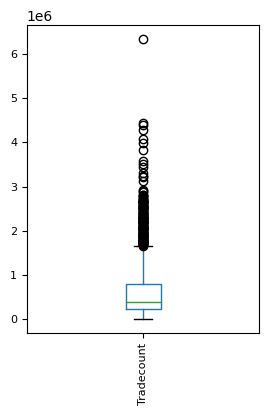

In [18]:
boxplot = crypto_data.boxplot(column=['Tradecount'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)


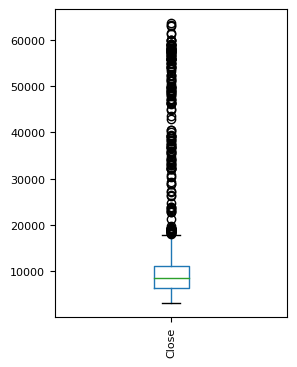

In [19]:
boxplot = crypto_data.boxplot(column=['Close'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)


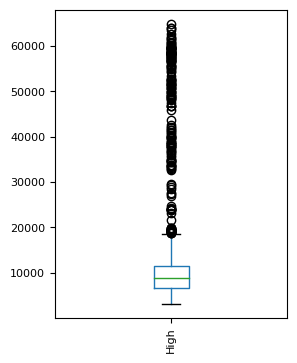

In [20]:
boxplot = crypto_data.boxplot(column=['High'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)


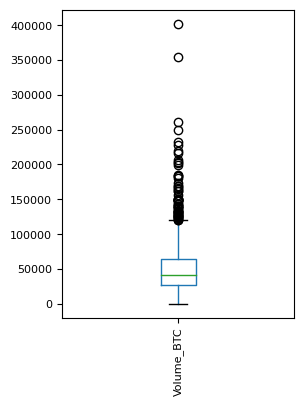

In [21]:
boxplot = crypto_data.boxplot(column=['Volume_BTC'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)


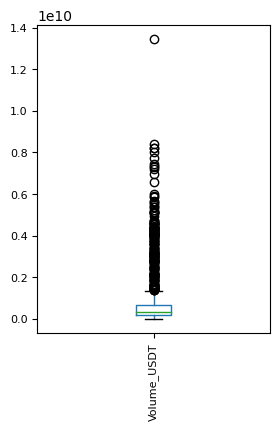

In [22]:
boxplot = crypto_data.boxplot(column=['Volume_USDT'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)

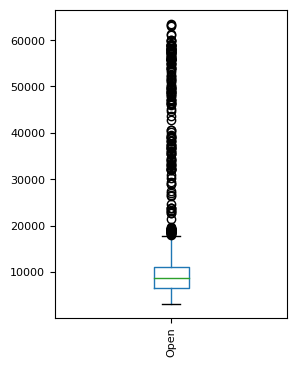

In [23]:
boxplot = crypto_data.boxplot(column=['Open'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)


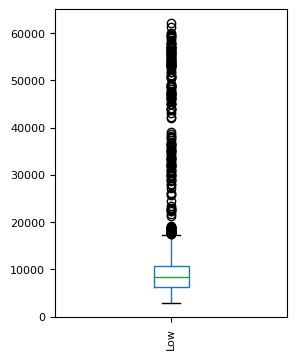

In [24]:
boxplot = crypto_data.boxplot(column=['Low'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)


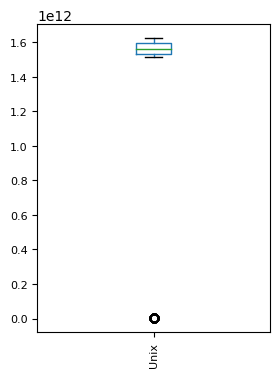

In [25]:
boxplot = crypto_data.boxplot(column=['Unix'],figsize = (3,4), rot = 90, fontsize= '8', grid = False)

In [26]:
# Silinecek outlierların alt ve üst sınır kontrolünü sağlayan bir fonksiyon.

def optimise_values(n):
    if n>=upper_limit:
        return upper_limit
    elif n<=lower_limit:
        return lower_limit
    else:
        return n

In [27]:
# Sütunlardaki outlier olan verileri sırasıyla silen bir döngü. Çeyreklikler göz önünde bulundurulmuştur.

cols = [ 'Unix','Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT', 'Tradecount']

for i in cols:
    perc_25 = crypto_data[i].quantile(.25)
    perc_75 = crypto_data[i].quantile(.75)
    iqr = perc_75 - perc_25
    upper_limit = perc_75 + 1.5 * iqr
    lower_limit = perc_25 - 1.5 * iqr
    crypto_data[i]=crypto_data[i].apply(optimise_values)

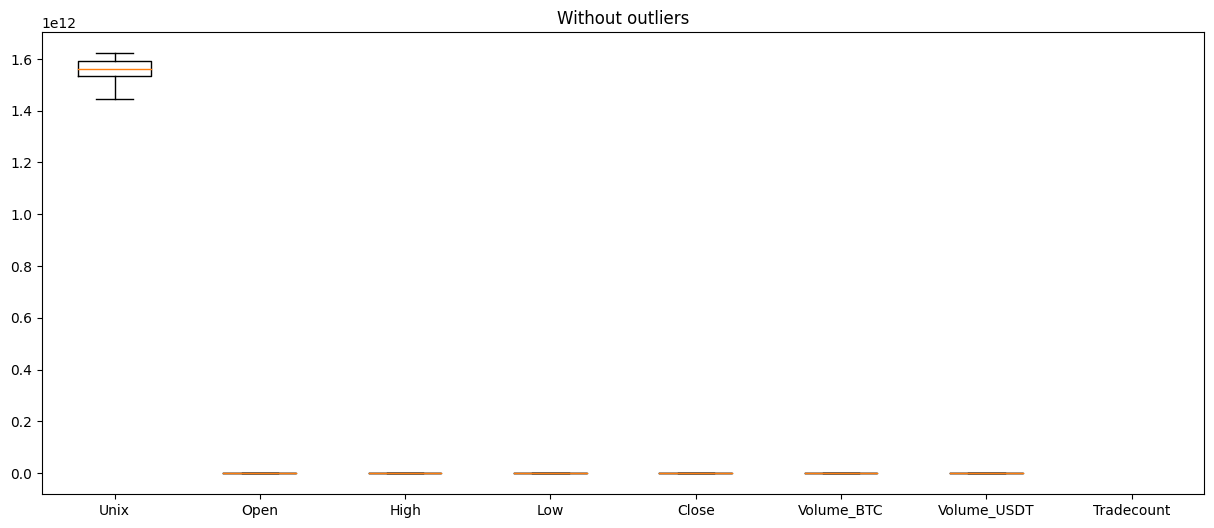

In [28]:
# Outlier'lar silindikten sonraki sütunlardaki verilerin görselleştirilmesi.

plt.figure(figsize=(15,6),dpi=100)
plt.boxplot(crypto_data[['Unix', 'Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT', 'Tradecount']],labels=['Unix', 'Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT', 'Tradecount'])
plt.title('Without outliers');

In [29]:
#ii) How many columns include missing values?

In [30]:
crypto_data.isnull()

Unix   Date  Symbol   Open   High    Low  Close  Volume_BTC  \
0     False  False   False  False  False  False  False       False   
1     False  False   False  False  False  False  False       False   
2     False  False   False  False  False  False  False       False   
3     False  False   False  False  False  False  False       False   
4     False  False   False  False  False  False  False       False   
...     ...    ...     ...    ...    ...    ...    ...         ...   
1376  False  False   False  False  False  False  False       False   
1377  False  False   False  False  False  False  False       False   
1378  False  False   False  False  False  False  False       False   
1379  False  False   False  False  False  False  False       False   
1380  False  False   False  False  False  False  False       False   

      Volume_USDT  Tradecount  
0           False       False  
1           False       False  
2           False       False  
3           False       False  
4           False       False  
...           ...         ...  
1376        False        True  
1377        False        True  
1378        False        True  
1379        False        True  
1380        False        True  

[1381 rows x 10 columns]

In [31]:
print("Count of missing values:")
print(crypto_data.isnull().sum())

Count of missing values:
Unix             0
Date             0
Symbol           0
Open             0
High             0
Low              0
Close            0
Volume_BTC       0
Volume_USDT      0
Tradecount     124
dtype: int64


In [32]:
#iii) Explain your method to handle each of those missing values.

In [33]:
crypto_data.head(4)

Unix                 Date    Symbol       Open     High        Low  \
0  1.622074e+12  2021-05-27 00:00:00  BTC/USDT  17955.985  18724.0  17401.575   
1  1.621987e+12  2021-05-26 00:00:00  BTC/USDT  17955.985  18724.0  17401.575   
2  1.621901e+12  2021-05-25 00:00:00  BTC/USDT  17955.985  18724.0  17401.575   
3  1.621814e+12  2021-05-24 00:00:00  BTC/USDT  17955.985  18724.0  17401.575   

       Close     Volume_BTC   Volume_USDT  Tradecount  
0  17976.585     328.737300  1.286808e+07      7097.0  
1  17976.585  104780.773396  1.353865e+09   1664801.0  
2  17976.585  111996.228404  1.353865e+09   1664801.0  
3  17976.585  120315.120786  1.353865e+09   1664801.0

In [34]:
mode_tradecount = crypto_data['Tradecount'].mode()[0]  # Tradecount sütununun modunu al

# Tradecount sütunundaki eksik değerlere sahip satırları seç
missing_tradecount_rows = crypto_data[crypto_data['Tradecount'].isnull()]

# Seçilen satırlardaki Tradecount sütununu belirtilen mod değeri ile doldur
crypto_data.loc[missing_tradecount_rows.index, 'Tradecount'] = mode_tradecount


In [35]:
 crypto_data.tail(4)

Unix        Date    Symbol     Open     High      Low    Close  \
1377  1.443226e+12  2017-08-20  BTC/USDT  4139.98  4211.08  4032.62  4086.29   
1378  1.443226e+12  2017-08-19  BTC/USDT  4108.37  4184.69  3850.00  4139.98   
1379  1.443226e+12  2017-08-18  BTC/USDT  4285.08  4371.52  3938.77  4108.37   
1380  1.443226e+12  2017-08-17  BTC/USDT  4469.93  4485.39  4200.74  4285.08   

      Volume_BTC  Volume_USDT  Tradecount  
1377      463.54   1915636.35   1664801.0  
1378      371.15   1508239.39   1664801.0  
1379     1178.07   4994493.56   1664801.0  
1380      647.86   2812379.11   1664801.0

In [36]:
print(crypto_data.isnull().sum())

Unix           0
Date           0
Symbol         0
Open           0
High           0
Low            0
Close          0
Volume_BTC     0
Volume_USDT    0
Tradecount     0
dtype: int64


In [37]:
#FEATURE ENGINEERING

In [38]:
#i)Determine which features are the most valuable and whether you need to create a new feature?

In [39]:
copy_= crypto_data.copy() # bu metot ile veri seti üzerinde direkt işlem yapmadan kopyalanmış datada işlem yapmamızı sağlar.
copy_

Unix                 Date    Symbol       Open      High  \
0     1.622074e+12  2021-05-27 00:00:00  BTC/USDT  17955.985  18724.00   
1     1.621987e+12  2021-05-26 00:00:00  BTC/USDT  17955.985  18724.00   
2     1.621901e+12  2021-05-25 00:00:00  BTC/USDT  17955.985  18724.00   
3     1.621814e+12  2021-05-24 00:00:00  BTC/USDT  17955.985  18724.00   
4     1.621728e+12  2021-05-23 00:00:00  BTC/USDT  17955.985  18724.00   
...            ...                  ...       ...        ...       ...   
1376  1.443226e+12           2017-08-21  BTC/USDT   4086.290   4119.62   
1377  1.443226e+12           2017-08-20  BTC/USDT   4139.980   4211.08   
1378  1.443226e+12           2017-08-19  BTC/USDT   4108.370   4184.69   
1379  1.443226e+12           2017-08-18  BTC/USDT   4285.080   4371.52   
1380  1.443226e+12           2017-08-17  BTC/USDT   4469.930   4485.39   

            Low      Close     Volume_BTC   Volume_USDT  Tradecount  
0     17401.575  17976.585     328.737300  1.286808e+07      7097.0  
1     17401.575  17976.585  104780.773396  1.353865e+09   1664801.0  
2     17401.575  17976.585  111996.228404  1.353865e+09   1664801.0  
3     17401.575  17976.585  120315.120786  1.353865e+09   1664801.0  
4     17401.575  17976.585  120315.120786  1.353865e+09   1664801.0  
...         ...        ...            ...           ...         ...  
1376   3911.790   4016.000     685.120000  2.770592e+06   1664801.0  
1377   4032.620   4086.290     463.540000  1.915636e+06   1664801.0  
1378   3850.000   4139.980     371.150000  1.508239e+06   1664801.0  
1379   3938.770   4108.370    1178.070000  4.994494e+06   1664801.0  
1380   4200.740   4285.080     647.860000  2.812379e+06   1664801.0  

[1381 rows x 10 columns]

In [40]:
corelation = crypto_data.corr() #it,s the corralation matrix to see corelation with features between each other.
corelation

Unix      Open      High       Low     Close  Volume_BTC  \
Unix         1.000000  0.531111  0.518333  0.550413  0.528450    0.674155   
Open         0.531111  1.000000  0.998201  0.996312  0.996526    0.462960   
High         0.518333  0.998201  1.000000  0.995437  0.998266    0.469893   
Low          0.550413  0.996312  0.995437  1.000000  0.997779    0.459067   
Close        0.528450  0.996526  0.998266  0.997779  1.000000    0.460905   
Volume_BTC   0.674155  0.462960  0.469893  0.459067  0.460905    1.000000   
Volume_USDT  0.707177  0.808191  0.813019  0.807939  0.806707    0.829206   
Tradecount   0.035594  0.540615  0.552617  0.538927  0.545743    0.341250   

             Volume_USDT  Tradecount  
Unix            0.707177    0.035594  
Open            0.808191    0.540615  
High            0.813019    0.552617  
Low             0.807939    0.538927  
Close           0.806707    0.545743  
Volume_BTC      0.829206    0.341250  
Volume_USDT     1.000000    0.598607  
Tradecount      0.598607    1.000000

In [41]:
covariance=crypto_data.cov()
covariance

Unix          Open          High           Low  \
Unix         2.164836e+21  1.070126e+14  1.095149e+14  1.066777e+14   
Open         1.070126e+14  1.875312e+07  1.962938e+07  1.797233e+07   
High         1.095149e+14  1.962938e+07  2.062071e+07  1.882946e+07   
Low          1.066777e+14  1.797233e+07  1.882946e+07  1.735179e+07   
Close        1.067073e+14  1.872851e+07  1.967323e+07  1.803783e+07   
Volume_BTC   9.527191e+14  6.089370e+07  6.481015e+07  5.808180e+07   
Volume_USDT  1.409019e+19  1.498742e+12  1.580989e+12  1.441209e+12   
Tradecount   9.436791e+14  1.334027e+09  1.429936e+09  1.279211e+09   

                    Close    Volume_BTC   Volume_USDT    Tradecount  
Unix         1.067073e+14  9.527191e+14  1.409019e+19  9.436791e+14  
Open         1.872851e+07  6.089370e+07  1.498742e+12  1.334027e+09  
High         1.967323e+07  6.481015e+07  1.580989e+12  1.429936e+09  
Low          1.803783e+07  5.808180e+07  1.441209e+12  1.279211e+09  
Close        1.883456e+07  6.075489e+07  1.499235e+12  1.349602e+09  
Volume_BTC   6.075489e+07  9.225385e+08  1.078526e+13  5.906153e+09  
Volume_USDT  1.499235e+12  1.078526e+13  1.833802e+17  1.460690e+14  
Tradecount   1.349602e+09  5.906153e+09  1.460690e+14  3.246984e+11

<Axes: >

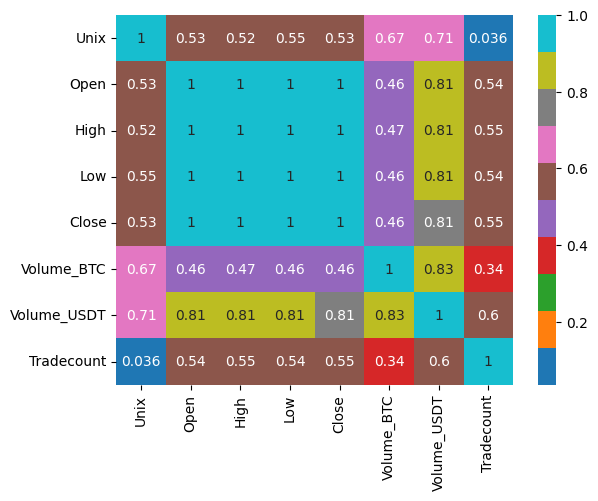

In [42]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap=sns.color_palette( as_cmap=True))


In [43]:
crypto_data.corr().abs()["Tradecount"].nlargest(11) #diğer sütunlarla olan korelasyon

Tradecount     1.000000
Volume_USDT    0.598607
High           0.552617
Close          0.545743
Open           0.540615
Low            0.538927
Volume_BTC     0.341250
Unix           0.035594
Name: Tradecount, dtype: float64

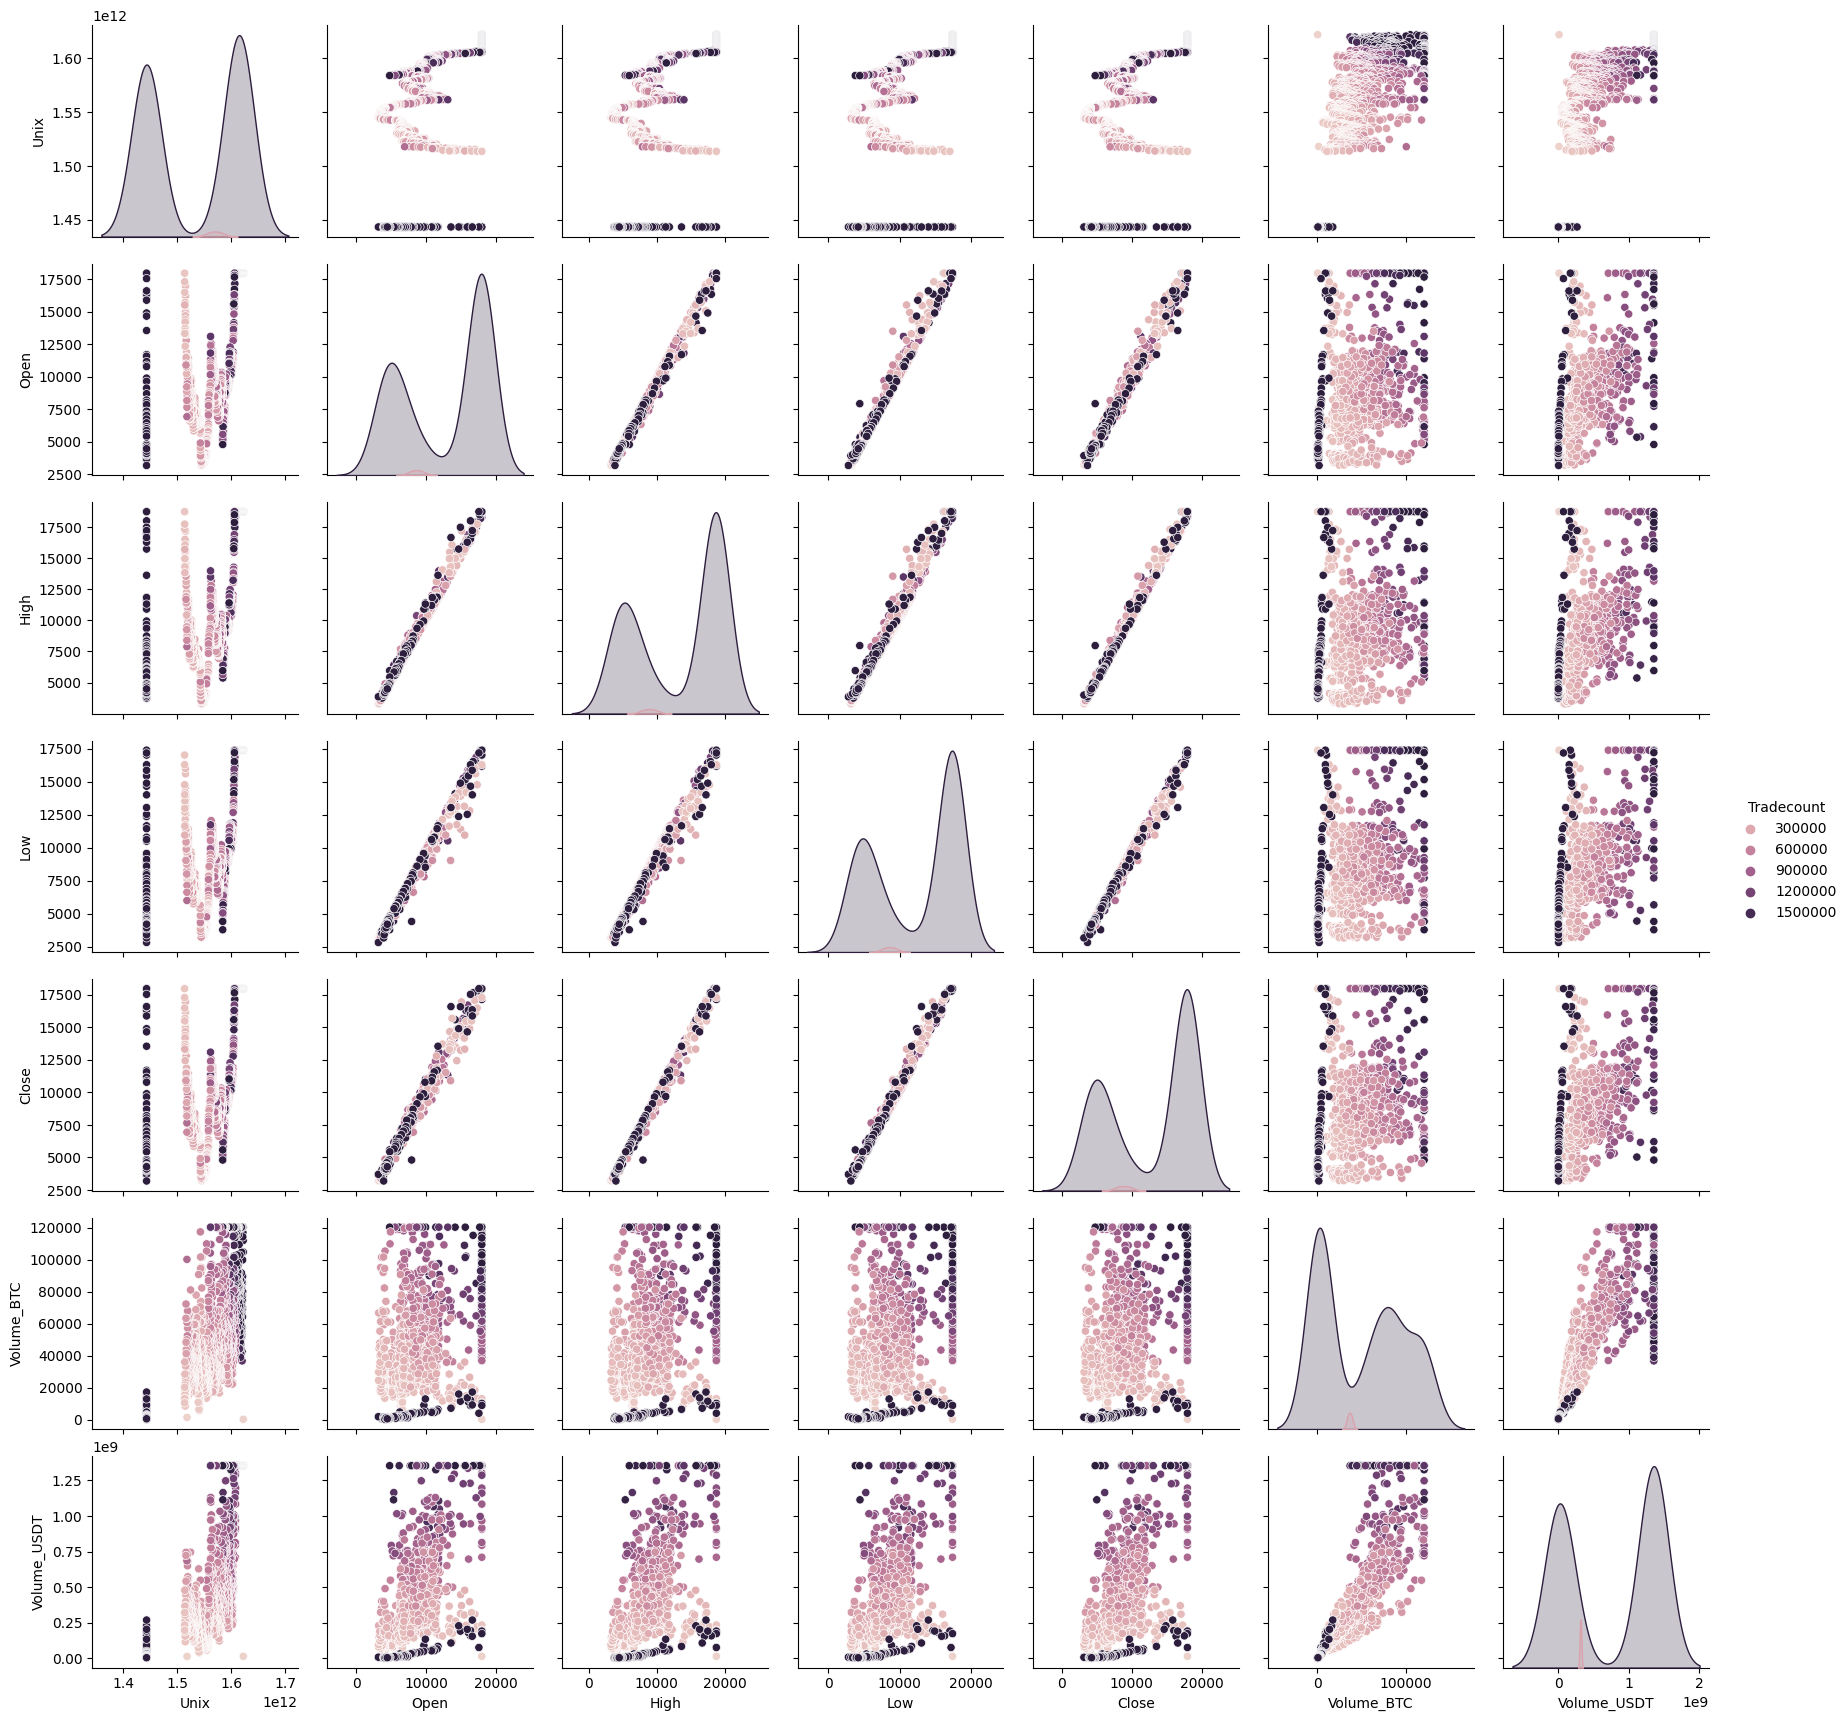

In [44]:
sns.pairplot(data=crypto_data, hue='Tradecount')# This is showing scatter plot of all features between Tradecount


<Axes: xlabel='Close', ylabel='Open'>

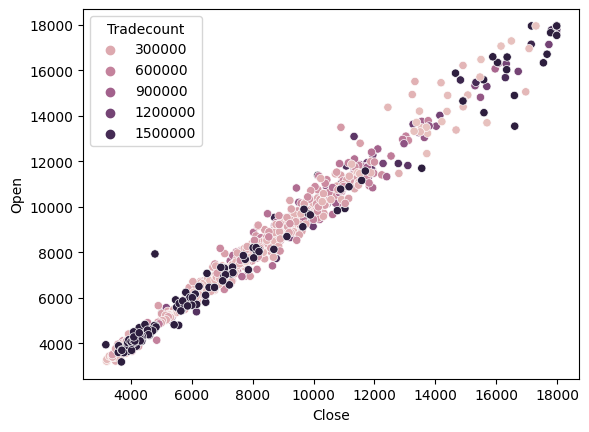

In [45]:
species = list(crypto_data.groupby('Tradecount'))
sns.scatterplot(data = crypto_data, x = 'Close', y = 'Open', hue='Tradecount')

In [46]:
#ii) Select (i.e., filter) or create features that make data mining algorithms work.

In [47]:
df = pd.DataFrame(crypto_data)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date' in descending order
df = df.sort_values(by='Date', ascending=False)

# Create a new column 'Price_Change' representing the percentage change in the closing price compared to the previous day
df['Price_Change'] = df['Close'].pct_change() * 100 #kapanış fiyatlarına göre yeni sütun

# Drop the first row (NaN value generated by pct_change)
df = df.dropna()

print(df[['Date', 'Close', 'Price_Change']])

           Date      Close  Price_Change
1    2021-05-26  17976.585      0.000000
2    2021-05-25  17976.585      0.000000
3    2021-05-24  17976.585      0.000000
4    2021-05-23  17976.585      0.000000
5    2021-05-22  17976.585      0.000000
...         ...        ...           ...
1376 2017-08-21   4016.000     -0.594059
1377 2017-08-20   4086.290      1.750249
1378 2017-08-19   4139.980      1.313906
1379 2017-08-18   4108.370     -0.763530
1380 2017-08-17   4285.080      4.301219

[1380 rows x 3 columns]


In [48]:
#iii. Apply dimensionality reduction i.e. PCA to your data.

In [49]:
# Tradecount sütununun label olarak seçilerek y ve X olarak verisetinin ayrılması.

X = crypto_data.drop('Tradecount',axis=1) #bağımsız değişkenler
y = crypto_data['Tradecount'] #bağımlı değişken

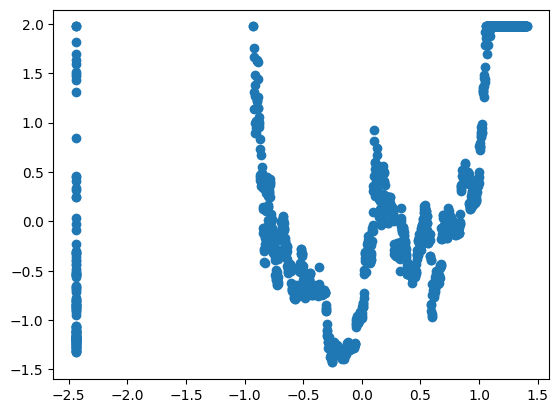

In [50]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
# (numeric) sütunları standartlaştırmak ve ardından standartlaştırılmış değerlerle bir saçılım (scatter) grafiği çizmek için
# Assuming X is your DataFrame, and you want to scale numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Separate non-numeric columns (like 'Date') and numeric columns
non_numeric_cols = X.columns.difference(numeric_cols)
X_numeric = X[numeric_cols]

# Standardize numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Create a DataFrame with scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# Plot the scatter plot with the scaled values
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 2])
plt.show()
#Bu tür standartlaştırma, özelliklerin farklı ölçeklerde olduğu durumlarda model performansını artırabilir

In [51]:
dfTemp_X_scaled = pd.DataFrame(X_scaled, columns=['Unix', 'Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT'])

dfTemp_y = pd.DataFrame(y,columns=['Tradecount'])
result = dfTemp_X_scaled.join(dfTemp_y, how='inner')

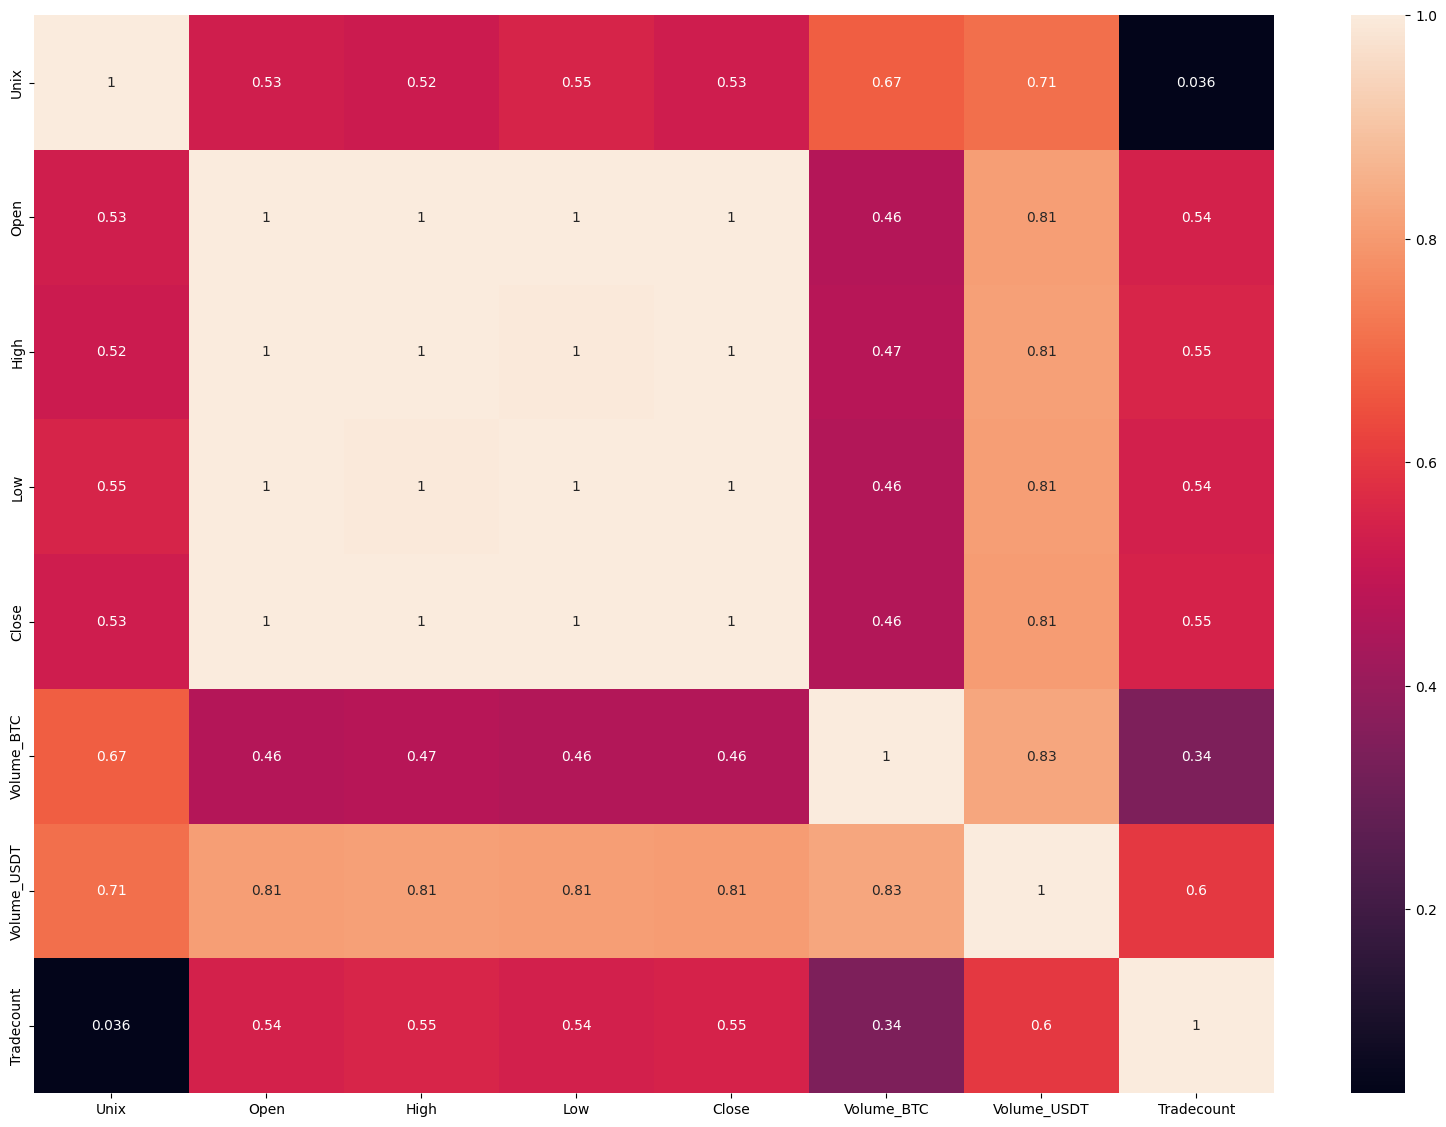

In [52]:
#değişkenler arasındaki korelasyon
plt.figure(figsize = (20, 14))
sns.heatmap(result.corr(), annot = True)
plt.show()

In [53]:
data2 = result.copy() #POzitif ve negatif korelasyonları gösterir
data2['Tradecount'] = y

corr = data2.corr()['Tradecount'].sort_values(ascending=False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

In [54]:
o=[] #Kategorik verileri sayısal verilere dönüştürmek için kullanılır
for i in crypto_data.columns:
    if crypto_data[i].dtype=='object':
        o.append(i)

Xenc=pd.get_dummies(crypto_data,columns=o)

In [55]:
Xenc.head(5)

Unix       Open     High        Low      Close     Volume_BTC  \
0  1.622074e+12  17955.985  18724.0  17401.575  17976.585     328.737300   
1  1.621987e+12  17955.985  18724.0  17401.575  17976.585  104780.773396   
2  1.621901e+12  17955.985  18724.0  17401.575  17976.585  111996.228404   
3  1.621814e+12  17955.985  18724.0  17401.575  17976.585  120315.120786   
4  1.621728e+12  17955.985  18724.0  17401.575  17976.585  120315.120786   

    Volume_USDT  Tradecount  Date_2017-08-17 00:00:00  \
0  1.286808e+07      7097.0                         0   
1  1.353865e+09   1664801.0                         0   
2  1.353865e+09   1664801.0                         0   
3  1.353865e+09   1664801.0                         0   
4  1.353865e+09   1664801.0                         0   

   Date_2017-08-18 00:00:00  ...  Date_2021-05-19 00:00:00  \
0                         0  ...                         0   
1                         0  ...                         0   
2                         0  ...                         0   
3                         0  ...                         0   
4                         0  ...                         0   

   Date_2021-05-20 00:00:00  Date_2021-05-21 00:00:00  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Date_2021-05-22 00:00:00  Date_2021-05-23 00:00:00  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         1   

   Date_2021-05-24 00:00:00  Date_2021-05-25 00:00:00  \
0                         0                         0   
1                         0                         0   
2                         0                         1   
3                         1                         0   
4                         0                         0   

   Date_2021-05-26 00:00:00  Date_2021-05-27 00:00:00  Symbol_BTC/USDT  
0                         0                         1                1  
1                         1                         0                1  
2                         0                         0                1  
3                         0                         0                1  
4                         0                         0                1  

[5 rows x 1389 columns]

In [56]:
data2 = data2.drop(columns = ['Open', 'Close'])

In [57]:
XTemp = data2.drop('Tradecount',axis=1)
y = data2['Tradecount']


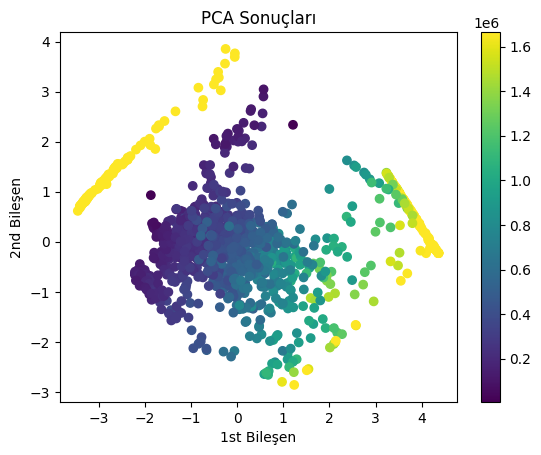

In [58]:
pca = PCA(n_components=3)

# PCA ile boyut azaltma
X_pca = pca.fit_transform(XTemp)

explained_variance_ratio = pca.explained_variance_ratio_  # Var
components = pca.components_  # özvektörler

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('1st Bileşen')
plt.ylabel('2nd Bileşen')
plt.title('PCA Sonuçları')
plt.colorbar()
plt.show()

In [59]:
#STEP 3

In [75]:
features = crypto_data[['Open', 'High', 'Low', 'Volume_BTC', 'Volume_USDT', 'Tradecount']]
target = crypto_data['Close']

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [80]:
# Grafik için zaman dizisi oluştur
time_series = crypto_data['Date']

In [81]:

})

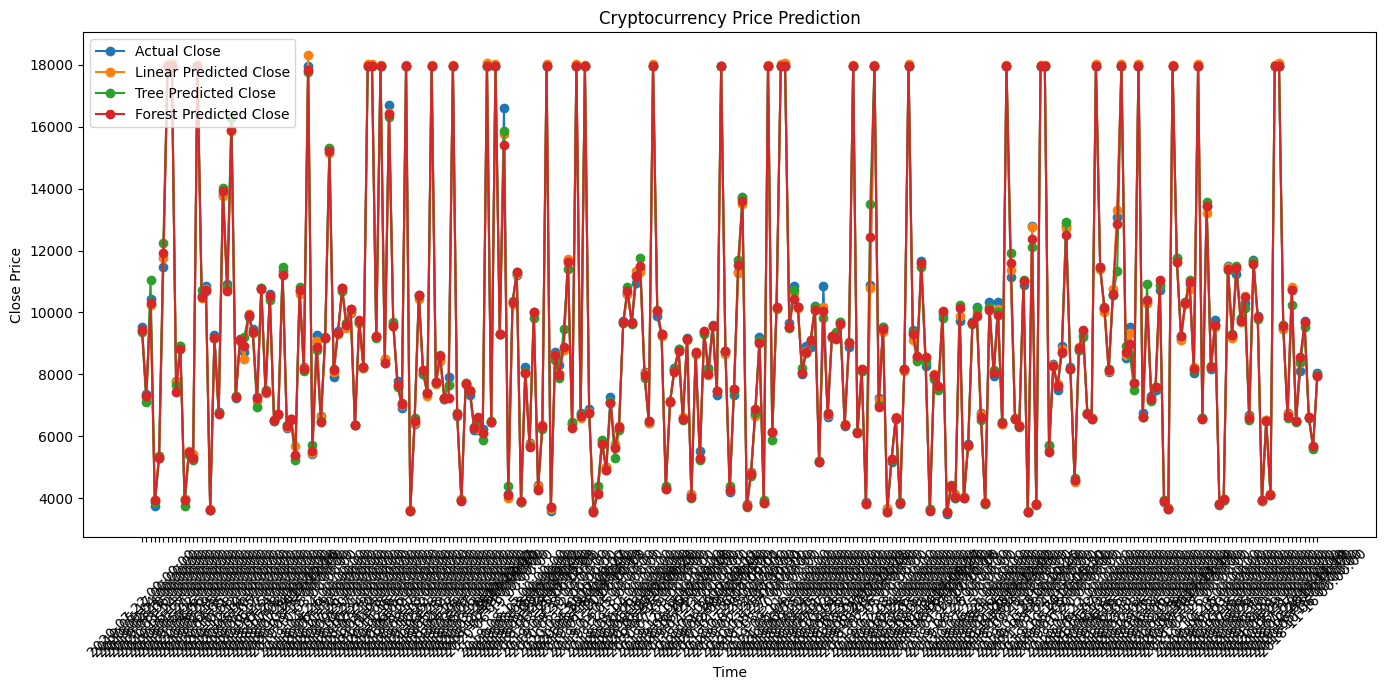

In [109]:
# Grafik oluşturma
plt.figure(figsize=(14, 7))
plt.plot(results['Time'], results['Actual_Close'], label='Actual Close', marker='o')
plt.plot(results['Time'], results['Linear_Predicted_Close'], label='Linear Predicted Close', marker='o')
plt.plot(results['Time'], results['Tree_Predicted_Close'], label='Tree Predicted Close', marker='o')
plt.plot(results['Time'], results['Forest_Predicted_Close'], label='Forest Predicted Close', marker='o')

# Grafik özellikleri
plt.title('Cryptocurrency Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Grafik gösterme
plt.show()

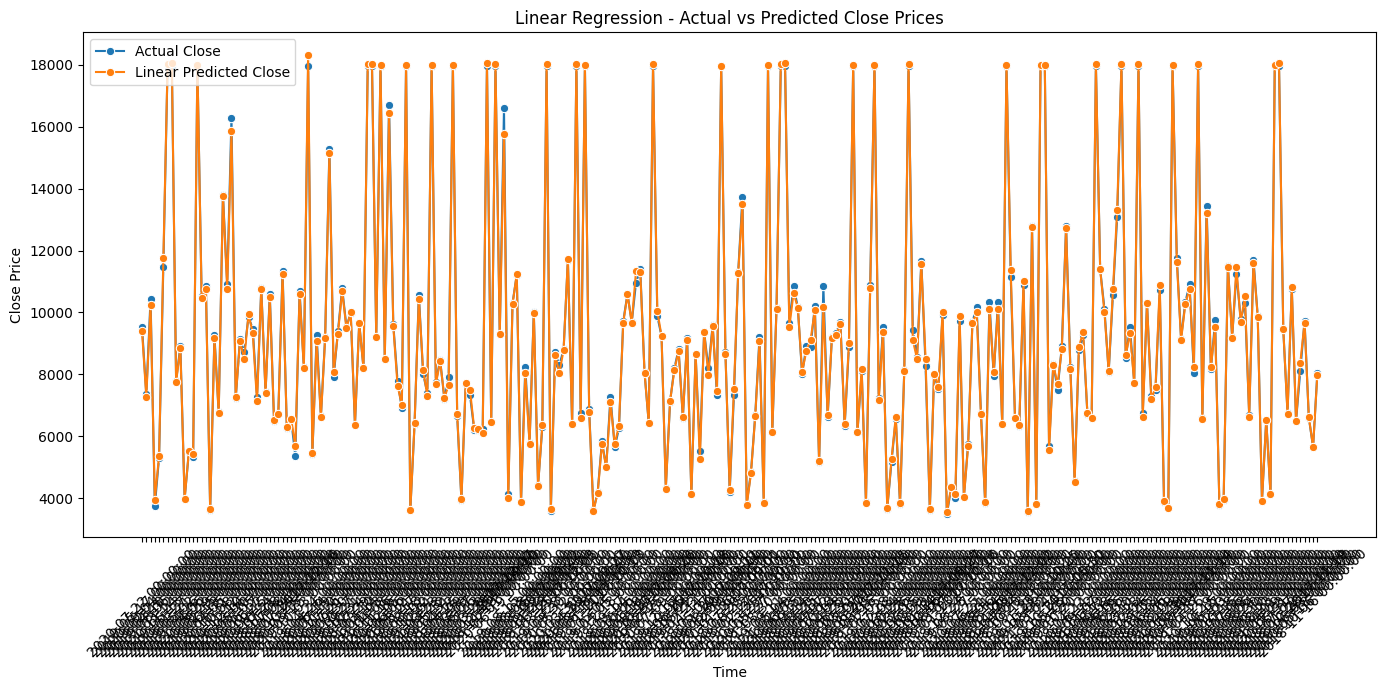

In [83]:
# Line plot for Linear Regression
plt.figure(figsize=(14,7))
sns.lineplot(x=results['Time'], y=results['Actual_Close'], label='Actual Close', marker='o')
sns.lineplot(x=results['Time'], y=results['Linear_Predicted_Close'], label='Linear Predicted Close', marker='o')
plt.title('Linear Regression - Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

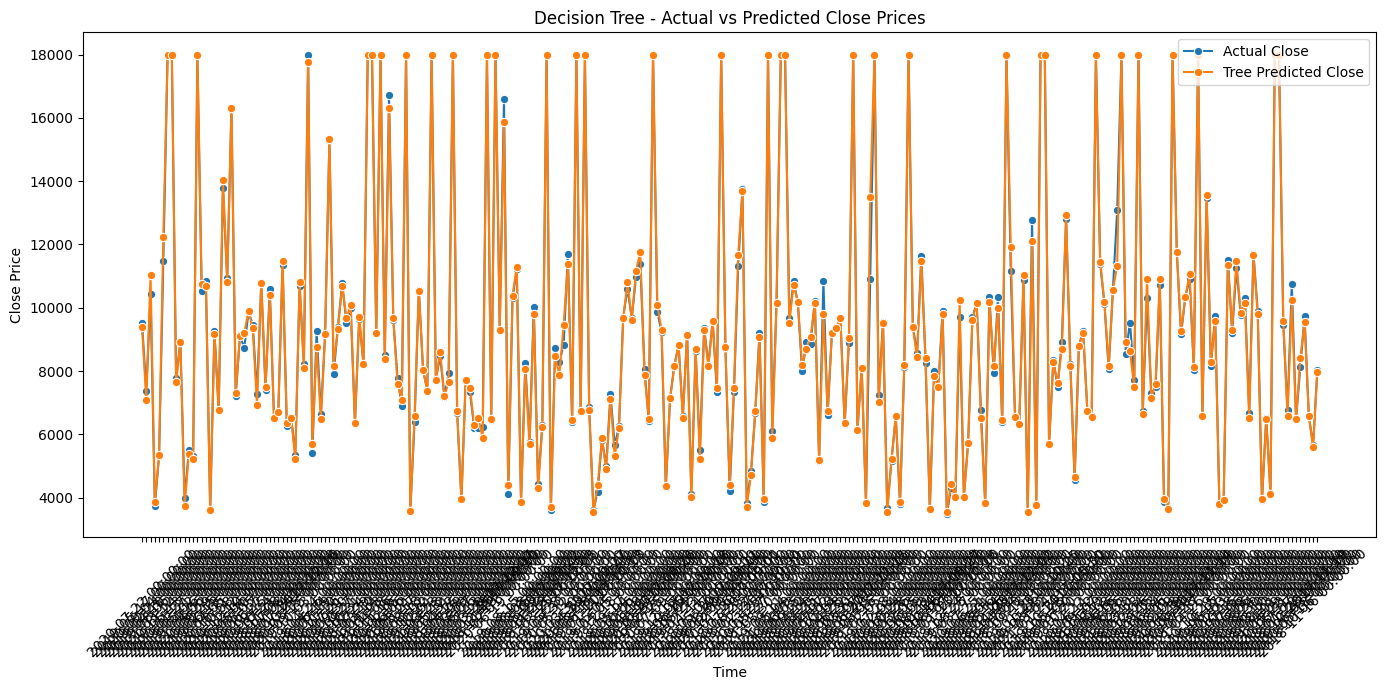

In [84]:
# Line plot for Decision Tree
plt.figure(figsize=(14, 7))
sns.lineplot(x=results['Time'], y=results['Actual_Close'], label='Actual Close', marker='o')
sns.lineplot(x=results['Time'], y=results['Tree_Predicted_Close'], label='Tree Predicted Close', marker='o')
plt.title('Decision Tree - Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


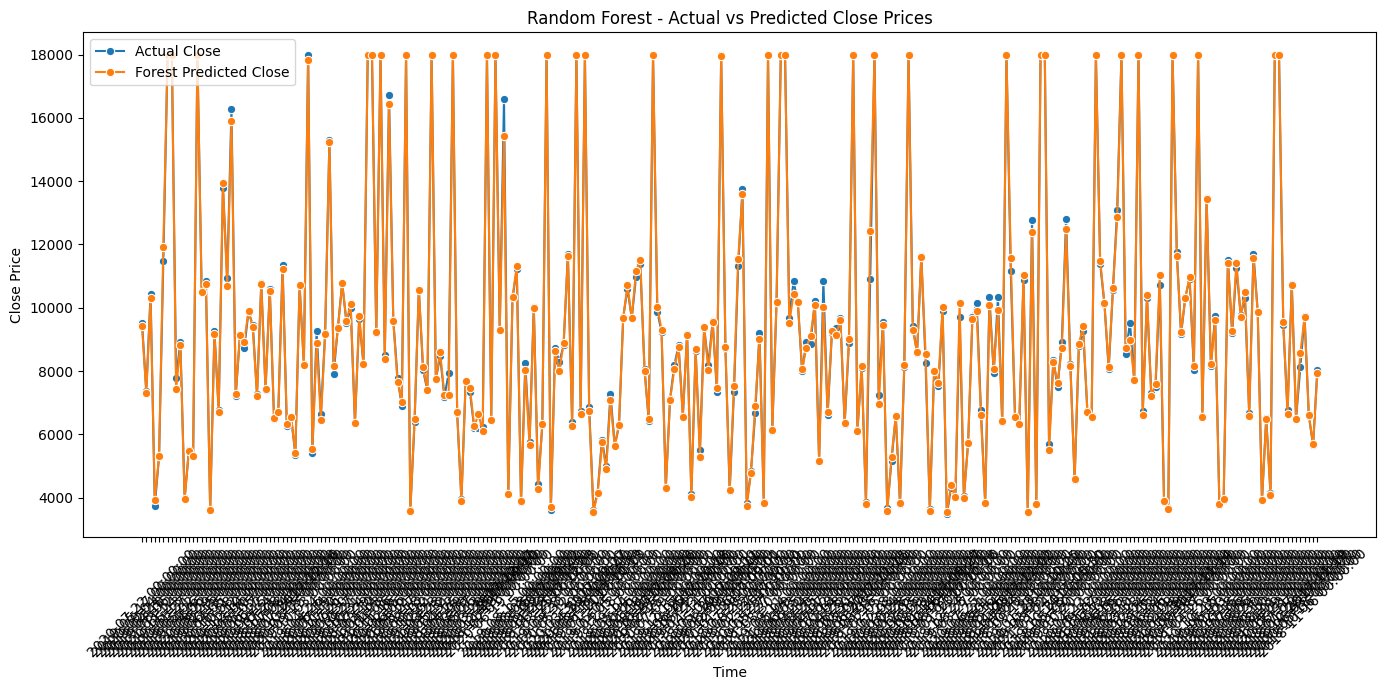

In [85]:
# Line plot for Random Forest
plt.figure(figsize=(14, 7))
sns.lineplot(x=results['Time'], y=results['Actual_Close'], label='Actual Close', marker='o')
sns.lineplot(x=results['Time'], y=results['Forest_Predicted_Close'], label='Forest Predicted Close', marker='o')
plt.title('Random Forest - Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [86]:
from statsmodels.tsa.arima.model import ARIMA

In [87]:
# Zaman serisini oluşturma
time_series = pd.to_datetime(crypto_data['Date'])
prices = crypto_data['Close']

# ARIMA modelini oluşturma ve eğitme
arima_model = ARIMA(prices, order=(5, 1, 2))  # Bu parametreleri ayarlamak için daha fazla analiz yapmak gerekebilir
arima_result = arima_model.fit()

# Tahminleri yapma
arima_predictions = arima_result.predict(start=len(prices), end=len(prices) + 10, typ='levels')  # Örneğin, bir sonraki 10 günü tahmin ediyoruz

# Gerçek ve tahmini fiyatları içeren bir DataFrame oluşturma
arima_results = pd.DataFrame({
    'Time': time_series,
    'Actual_Open': prices,
    'ARIMA_Predicted_Open': arima_predictions
})


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


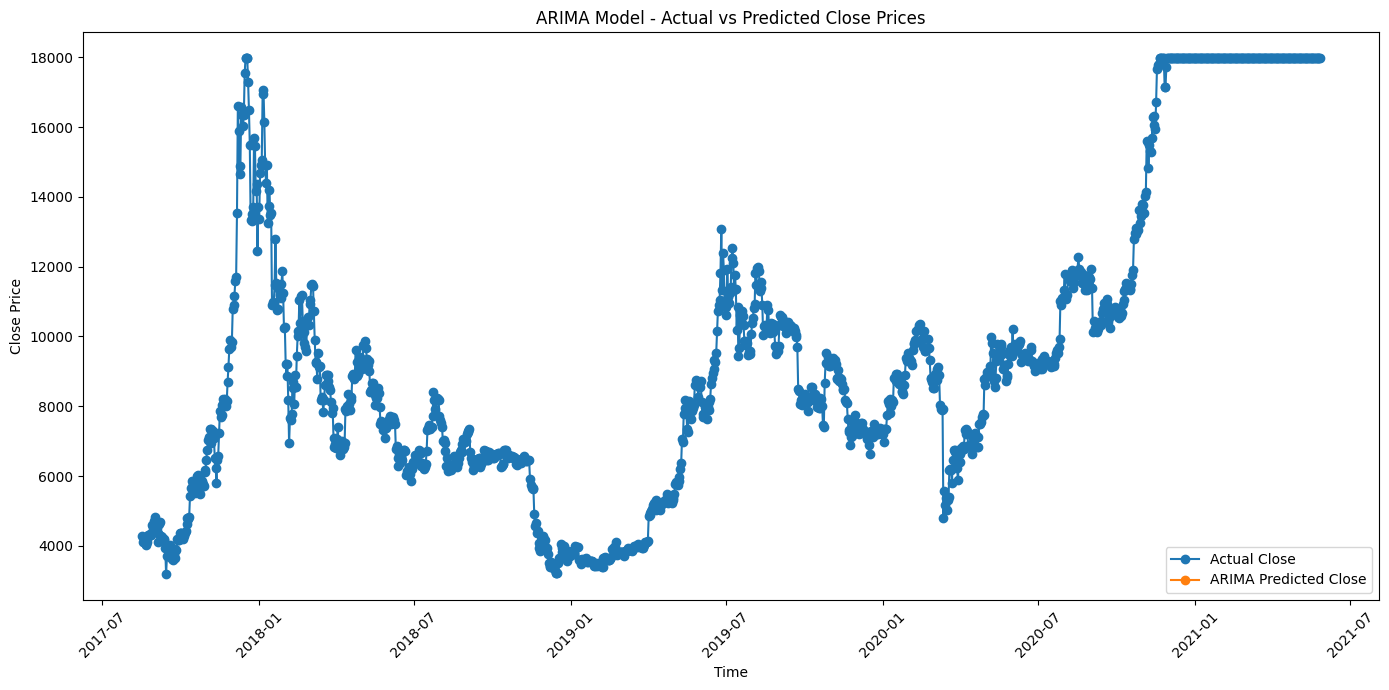

In [88]:
# Grafik oluşturma
plt.figure(figsize=(14, 7))
plt.plot(arima_results['Time'], arima_results['Actual_Open'], label='Actual Close', marker='o')
plt.plot(arima_results['Time'], arima_results['ARIMA_Predicted_Open'], label='ARIMA Predicted Close', marker='o')
plt.title('ARIMA Model - Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Linear Regression RMSE: 126.30952200362442
Decision Tree RMSE: 271.89502385118425
Random Forest RMSE: 187.54997177520784


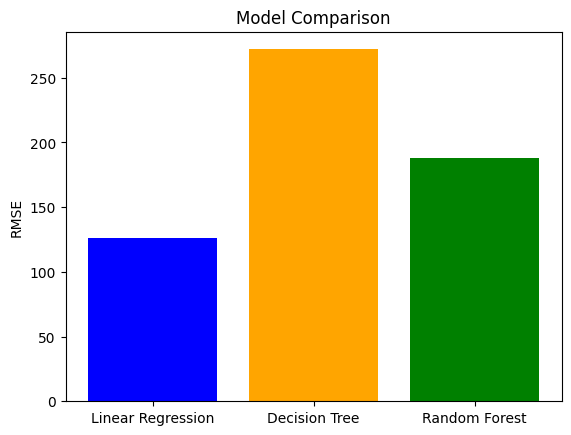

En iyi model: Linear Regression


In [89]:
# RMSE hesaplamak için bir fonksiyon  root mean square error
def calculate_rmse(actual, predicted):
    return mean_squared_error(actual, predicted, squared=False)

# Model performansını hesapla
linear_rmse = calculate_rmse(y_test, linear_predictions)
tree_rmse = calculate_rmse(y_test, tree_predictions)
forest_rmse = calculate_rmse(y_test, forest_predictions)

# Performansı karşılaştır
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", tree_rmse)
print("Random Forest RMSE:", forest_rmse)

# En iyi modeli belirle
best_model = min(linear_rmse, tree_rmse, forest_rmse)

# Sonuçları görselleştir
plt.bar(['Linear Regression', 'Decision Tree', 'Random Forest'], [linear_rmse, tree_rmse, forest_rmse], color=['blue', 'orange', 'green'])
plt.ylabel('RMSE')
plt.title('Model Comparison')
plt.show()

# En iyi modeli yazdır
print("En iyi model:", end=' ')
if best_model == linear_rmse:
    print("Linear Regression")
elif best_model == tree_rmse:
    print("Decision Tree")
else:
    print("Random Forest")

In [90]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [96]:
from sklearn.metrics import r2_score
#Modelin daha iyi uyum sağlaması
# Calculate R^2 scores
r2_linear = r2_score(results['Actual_Close'], results['Linear_Predicted_Close'])
r2_tree = r2_score(results['Actual_Close'], results['Tree_Predicted_Close'])
r2_forest = r2_score(results['Actual_Close'], results['Forest_Predicted_Close'])

# Print the R^2 scores
print(f'R^2 Linear Regression: {r2_linear}')
print(f'R^2 Decision Tree: {r2_tree}')
print(f'R^2 Random Forest: {r2_forest}')


R^2 Linear Regression: 0.9990271574846606
R^2 Decision Tree: 0.9954921144908878
R^2 Random Forest: 0.9978551132570375


In [ ]:
#COMMENTS

# kripto para birimi fiyat tahmini için Doğrusal Regresyon, Karar Ağaçları ve Rastgele Ormanları içeriyordu.
#Her model için gerçek ve öngörülen fiyatları karşılaştırmak için görselleştirmeler oluşturuldu.

#Random forest modeli için GridSearchCV kullanılarak hiperparametre ayarı yapıldı.
#Zorluklar ve Zorluklar:
#Veri kümesi, özellikler ve hedef değişken, model performansının belirlenmesinde çok önemlidir.
#Özelliklerin uygunluğunu ve kalitesini sağlamak önemli bir zorluktur.

#Hedeflerin Değerlendirilmesi:
#Model Performansını Anlamak: Görselleştirmeler ve RMSE değerleri, her modelin performansına ilişkin.

#Daha Fazla Analiz: Finansal zaman serisi verileri için çok uygun olabilecek zaman serisine özgü modeller (örn. ARIMA, SARIMA) gibi teknikler daha uygun.

#Projenin başarısını değerlendirmek, sorunun, veri kümesinin ve kripto para birimi fiyat tahmininin nüanslarının kapsamlı bir şekilde anlaşılmasını gerektirir.
#Gerçek dünya senaryosunda proje hedefine ulaşmak, geri bildirime dayalı olarak sürekli iyileştirmeyi, alternatif modellerin araştırılmasını ve kripto para birimi fiyatlarını etkileyen ek faktörlerin dikkate alınmasını içerir.